In [ ]:
#importing all the models i will be using
import pandas as pd #for data manipulation and analysis like creating and handling DataFrames
import numpy as np #for numerical computations like handling arrays and performing mathematical operations
import matplotlib.pyplot as plt #for creating plots and visualizations like boxplots and scatter plots
import seaborn as sns #for creating visualizations like scatter plots and heatmaps
from tabulate import tabulate #for better looking tables that provide better readability
from sklearn.preprocessing import StandardScaler # for scaling continuous features
from sklearn.model_selection import train_test_split #for splitting data into training and testing sets, and for cross-validation
from sklearn.model_selection import cross_validate #for evaluating the performance of a model using cross-validation
from scipy.stats import ttest_ind, chi2_contingency #for t-test and chi-squared test
from sklearn.model_selection import StratifiedKFold, cross_val_score #for cross-validation with stratified folds
from sklearn.ensemble import RandomForestClassifier #for building a random forest classifier
from imblearn.over_sampling import SMOTE #for handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.pipeline import Pipeline #for creating a pipeline that combines oversampling and model training
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tuning using randomized search
from sklearn.feature_selection import SelectKBest, f_classif #for feature selection using ANOVA F-test
from sklearn.metrics import classification_report #for generating a classification report that includes precision, recall, and F1-score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay #for visualizing ROC curves and confusion matrices




Pandas is a library used for working with data sets.It provides functions for data exploration, cleaning, analysis, and manipulation.(w3schools, 2025)

Seaborn is a library for making statistical graphics in Python. It strongly connects with pandas data structures and builds upon matplotlib.(Wasksom, 2024)

Matplotlib is a cross-platform library for Python and its numerical extension NumPy that provides graphical plotting and data visualization tools, such as bar charts, scatter plots, and histograms.(Activestate Software, 2025)

NumPy is for scientific computing.  A multidimensional array object, different derived objects (like masked arrays and matrices), and a variety of routines for quick array operations—including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation, and much more—are provided by thislibrary.(NumPy Developers, 2024)

To guarantee objective model evaluation in machine learning, you can effectively separate your dataset into training and testing subsets using scikit-learn's train_test_split() function.  By separating the test data from the training data, this procedure helps avoid overfitting and underfitting and enables you to precisely evaluate the model's predicted performance.(Stojiljković, 2025)



In [90]:
#loading the dataset using pandas
df = pd.read_csv("The_Cancer_data_1500_V2.csv")
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Please store the dataset in the same directory as the notebook

In [58]:
# displaying the initial data shape in a tabular format
rows, columns = df.shape
print("Initial Data Shape:")
dfshape = pd.DataFrame({'Rows': [rows], 'Columns': [columns]})
print(dfshape)


Initial Data Shape:
   Rows  Columns
0  1500        9


In [59]:
# Displaying the data info of each column using tabulate for better visuals and readability

# Creating a DataFrame summarizing column names, non-null counts, and data types
info_df = pd.DataFrame({
  "Column": df.columns,
  "Non-Null Count": df.notnull().sum(),
  "Dtype": df.dtypes.astype(str)
})

# Print the summary table using tabulate for better formatting
print(tabulate(info_df, headers="keys", tablefmt="grid", showindex=False))


+------------------+------------------+---------+
| Column           |   Non-Null Count | Dtype   |
+==================+==================+=========+
| Age              |             1500 | int64   |
+------------------+------------------+---------+
| Gender           |             1500 | int64   |
+------------------+------------------+---------+
| BMI              |             1500 | float64 |
+------------------+------------------+---------+
| Smoking          |             1500 | int64   |
+------------------+------------------+---------+
| GeneticRisk      |             1500 | int64   |
+------------------+------------------+---------+
| PhysicalActivity |             1500 | float64 |
+------------------+------------------+---------+
| AlcoholIntake    |             1500 | float64 |
+------------------+------------------+---------+
| CancerHistory    |             1500 | int64   |
+------------------+------------------+---------+
| Diagnosis        |             1500 | int64   |


I used the tabulate import from tabulate to make the datatypes output look more presentable. The code used was sourced from geeksforgeeks, 2024. Introduction to Python Tabulate Library. [online] geeksforgeeks. Available at: <https://www.geeksforgeeks.org/introduction-to-python-tabulate-library/> [Accessed 24 May 2025].

In [81]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [ ]:
# This is where I would be dropping columns but at a quick glance all the predictors seem relevant to the target variable, so I will not drop any columns at this time.
#checking for missing values in the data
null_values = df.isnull().sum()
print(tabulate(null_values.reset_index(), headers=["Column", "Missing Values"], showindex=False, tablefmt="grid", colalign=("left", "center")))

+------------------+------------------+
| Column           |  Missing Values  |
+==================+==================+
| Age              |        0         |
+------------------+------------------+
| Gender           |        0         |
+------------------+------------------+
| BMI              |        0         |
+------------------+------------------+
| Smoking          |        0         |
+------------------+------------------+
| GeneticRisk      |        0         |
+------------------+------------------+
| PhysicalActivity |        0         |
+------------------+------------------+
| AlcoholIntake    |        0         |
+------------------+------------------+
| CancerHistory    |        0         |
+------------------+------------------+
| Diagnosis        |        0         |
+------------------+------------------+


In [61]:
# Checking for duplicates in the data and displaying the results
dtDuplicates = df.duplicated()
print(tabulate(dtDuplicates.reset_index(), headers=["Index", "Is Duplicate"], showindex=False, tablefmt="grid", colalign=("left", "center")))

+---------+----------------+
| Index   |  Is Duplicate  |
+=========+================+
| 0       |     False      |
+---------+----------------+
| 1       |     False      |
+---------+----------------+
| 2       |     False      |
+---------+----------------+
| 3       |     False      |
+---------+----------------+
| 4       |     False      |
+---------+----------------+
| 5       |     False      |
+---------+----------------+
| 6       |     False      |
+---------+----------------+
| 7       |     False      |
+---------+----------------+
| 8       |     False      |
+---------+----------------+
| 9       |     False      |
+---------+----------------+
| 10      |     False      |
+---------+----------------+
| 11      |     False      |
+---------+----------------+
| 12      |     False      |
+---------+----------------+
| 13      |     False      |
+---------+----------------+
| 14      |     False      |
+---------+----------------+
| 15      |     False      |
+---------+---

In [82]:
diagnosis_counts = df['Diagnosis'].value_counts()
print("Diagnosis Class Distribution:\n")
print(f"No Cancer (0): {diagnosis_counts[0]} rows")
print(f"Cancer (1):    {diagnosis_counts[1]} rows")


Diagnosis Class Distribution:

No Cancer (0): 943 rows
Cancer (1):    557 rows


**Exploratory Data Analysis**

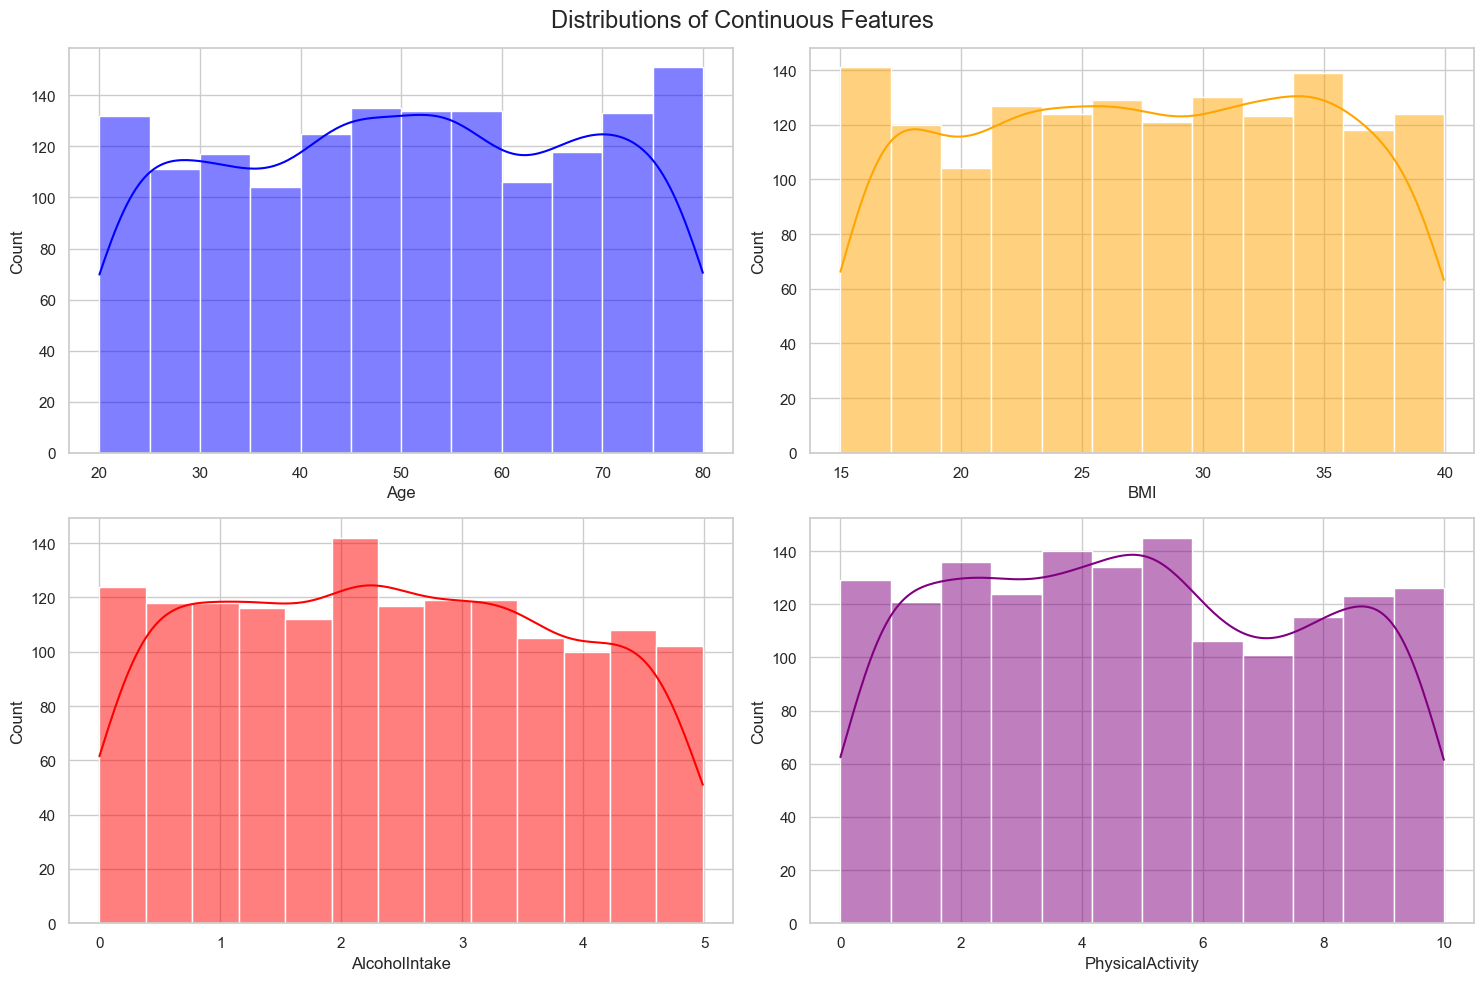

In [62]:
#visualising the distributions of the continuous features using seaborn histogram
#kde is set to true to draw a smooth curve to represent the distribution along with the histogram.
#each histogram is set to a different color for better visual distinction.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df["Age"], kde=True, ax=axes[0, 0], color="blue")
sns.histplot(df["BMI"], kde=True, ax=axes[0, 1], color="orange")
sns.histplot(df["AlcoholIntake"], kde=True, ax=axes[1, 0], color="red")
sns.histplot(df["PhysicalActivity"], kde=True, ax=axes[1, 1], color="purple")
fig.suptitle("Distributions of Continuous Features", fontsize=17)
plt.tight_layout()

The distribution of one or more variables is represented by a histogram, a traditional visualization tool that counts the number of observations that fall into distinct bins Waskmon, M. (2024). seaborn.histplot. Seaborn. https://seaborn.pydata.org/generated/seaborn.histplot.html.

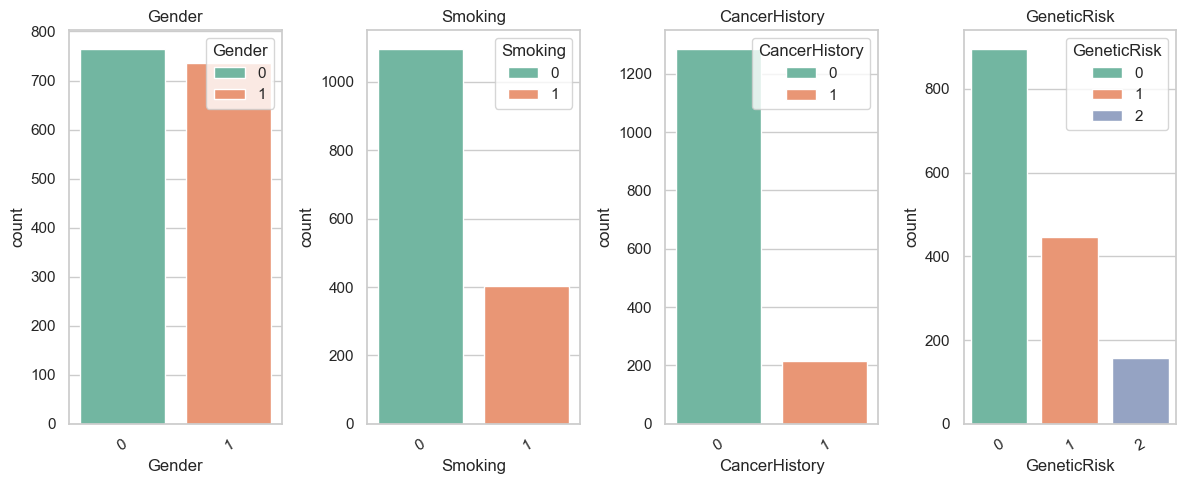

In [68]:
#now im going to use bar graphs to visualise the distributions of the categorical features as opposed to histograms.
cat_columns = ['Gender', 'Smoking', 'CancerHistory', 'GeneticRisk']

#I am using a for loop to go through each categorical variable i assigned above to create boxplot for each one.
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_columns):
    plt.subplot(1, 5, i+1)
    sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=True)
    plt.title(f"{col}")
    plt.xticks(rotation=30)
plt.tight_layout()


While bar charts show categorical variables, histograms show numerical or quantitative data Velez, A. (2022, January 28). <https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts>.

In [86]:

# assigning the continuous features to a list that will be iterated in a for loop to detect outliers for each feature.
continuous_features = ['Age', 'BMI', 'AlcoholIntake', 'PhysicalActivity']

def detect_outliers_iqr(df, continuous_features):
    outliers = {}
    for col in continuous_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outlier_rows.shape[0],
            'Outlier Percentage': round(100 * outlier_rows.shape[0] / df.shape[0], 2)
        }
    return pd.DataFrame(outliers).T

outliers = detect_outliers_iqr(df, continuous_features)
print(outliers)

                  Lower Bound  Upper Bound  Outlier Count  Outlier Percentage
Age                -11.500000   112.500000            0.0                 0.0
BMI                  2.931579    52.402392            0.0                 0.0
AlcoholIntake       -2.351943     7.148165            0.0                 0.0
PhysicalActivity    -5.028320    14.872825            0.0                 0.0


Outlier detection use IQR method was inspiried by Mehreen, K. (2024, August 27). How to Handle Outliers in Dataset with Pandas. KDnuggest. https://www.kdnuggets.com/how-to-handle-outliers-in-dataset-with-pandas?utm_source=chatgpt.com

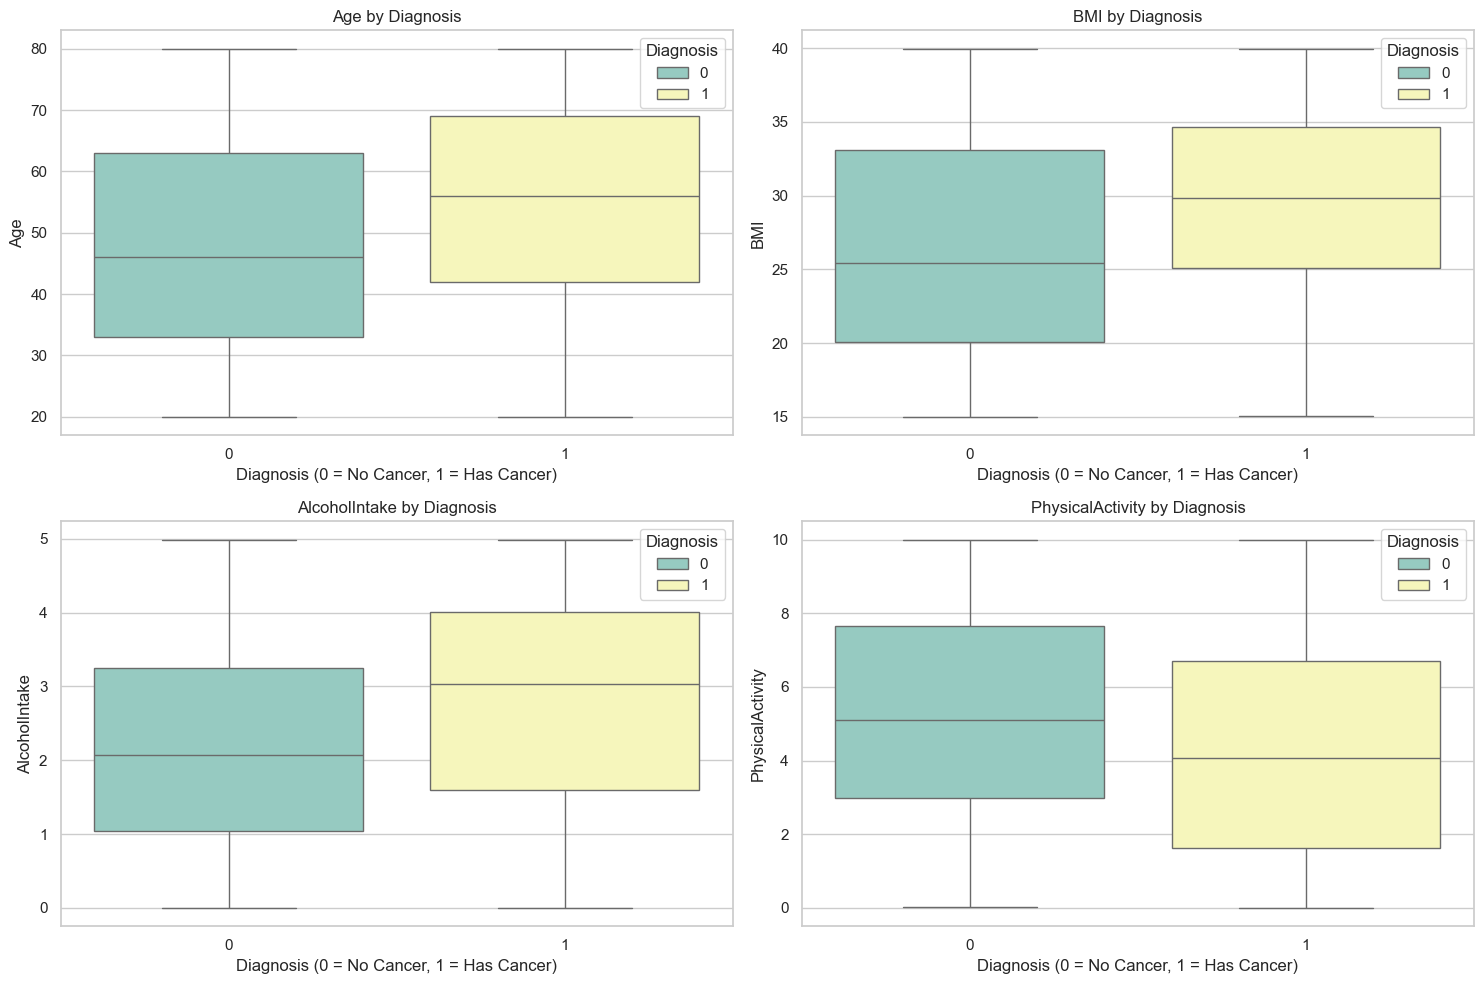

In [161]:
#creating boxplots for the continuous features against the target variable to see the distribution and see the mean average of each feature for each class in the target variable. Furtrher more to see if there are any outliers in the data.
#im setting the plot style to whitegrid because I find it make intepreting the mean averages easier
sns.set(style="whitegrid")
# Create box plots for each continuous feature against 'Diagnosis'
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
    sns.boxplot(x='Diagnosis', y=col, hue='Diagnosis', data=df, ax=axes[i], palette="Set3", legend=True)
    axes[i].set_title(f"{col} by Diagnosis") 
    axes[i].set_xlabel("Diagnosis (0 = No Cancer, 1 = Has Cancer)")
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

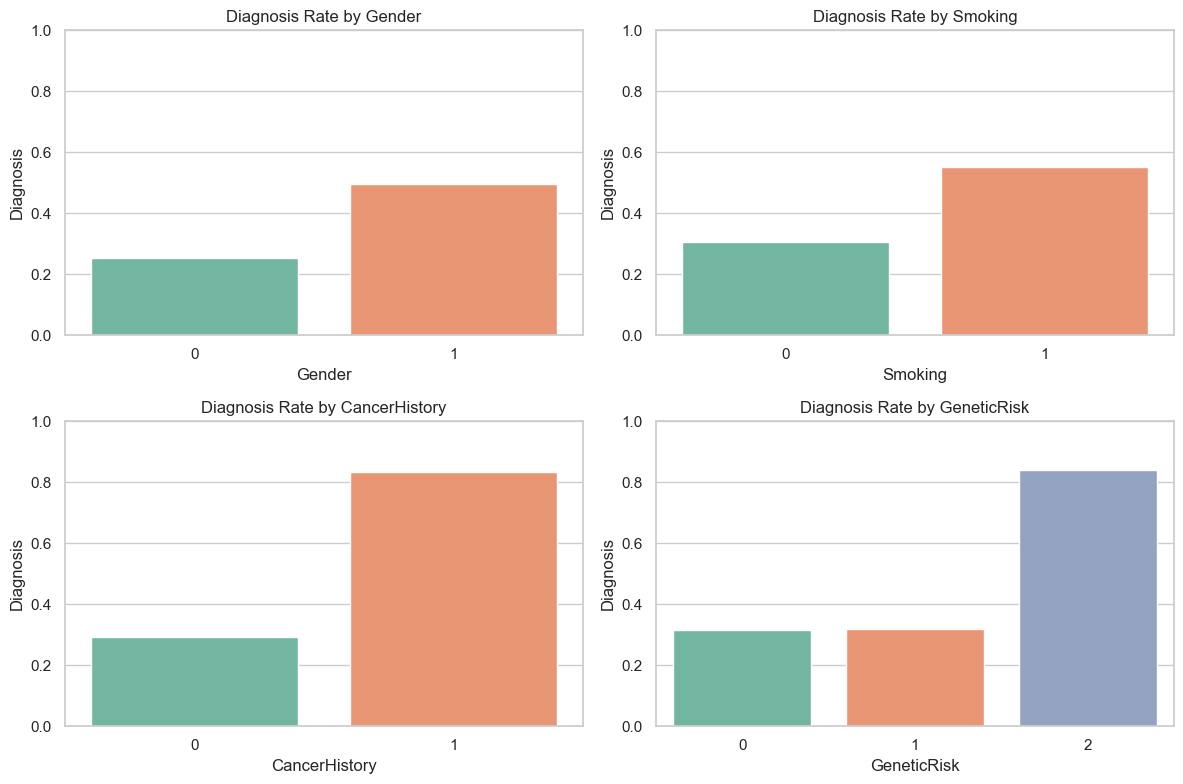

In [ ]:
# Displaying the mean cancer diagnosis rate for each categorical variable barplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(cat_columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=col, y='Diagnosis', data=df, estimator=np.mean, errorbar=None, palette='Set2', hue=col, legend=False, ax=ax)
    ax.set_title(f"Diagnosis Rate by {col}")
    ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

Age       BMI  AlcoholIntake  \
Diagnosis                                                       
0         Age               1.000000  0.005707      -0.071620   
          BMI               0.005707  1.000000      -0.047778   
          AlcoholIntake    -0.071620 -0.047778       1.000000   
          PhysicalActivity  0.056216  0.030952       0.042468   
1         Age               1.000000 -0.031523       0.013327   
          BMI              -0.031523  1.000000      -0.016678   
          AlcoholIntake     0.013327 -0.016678       1.000000   
          PhysicalActivity  0.033037  0.058340       0.107203   

                            PhysicalActivity  
Diagnosis                                     
0         Age                       0.056216  
          BMI                       0.030952  
          AlcoholIntake             0.042468  
          PhysicalActivity          1.000000  
1         Age                       0.033037  
          BMI                       0.058340  
          AlcoholIntake             0.107203  
          PhysicalActivity          1.000000

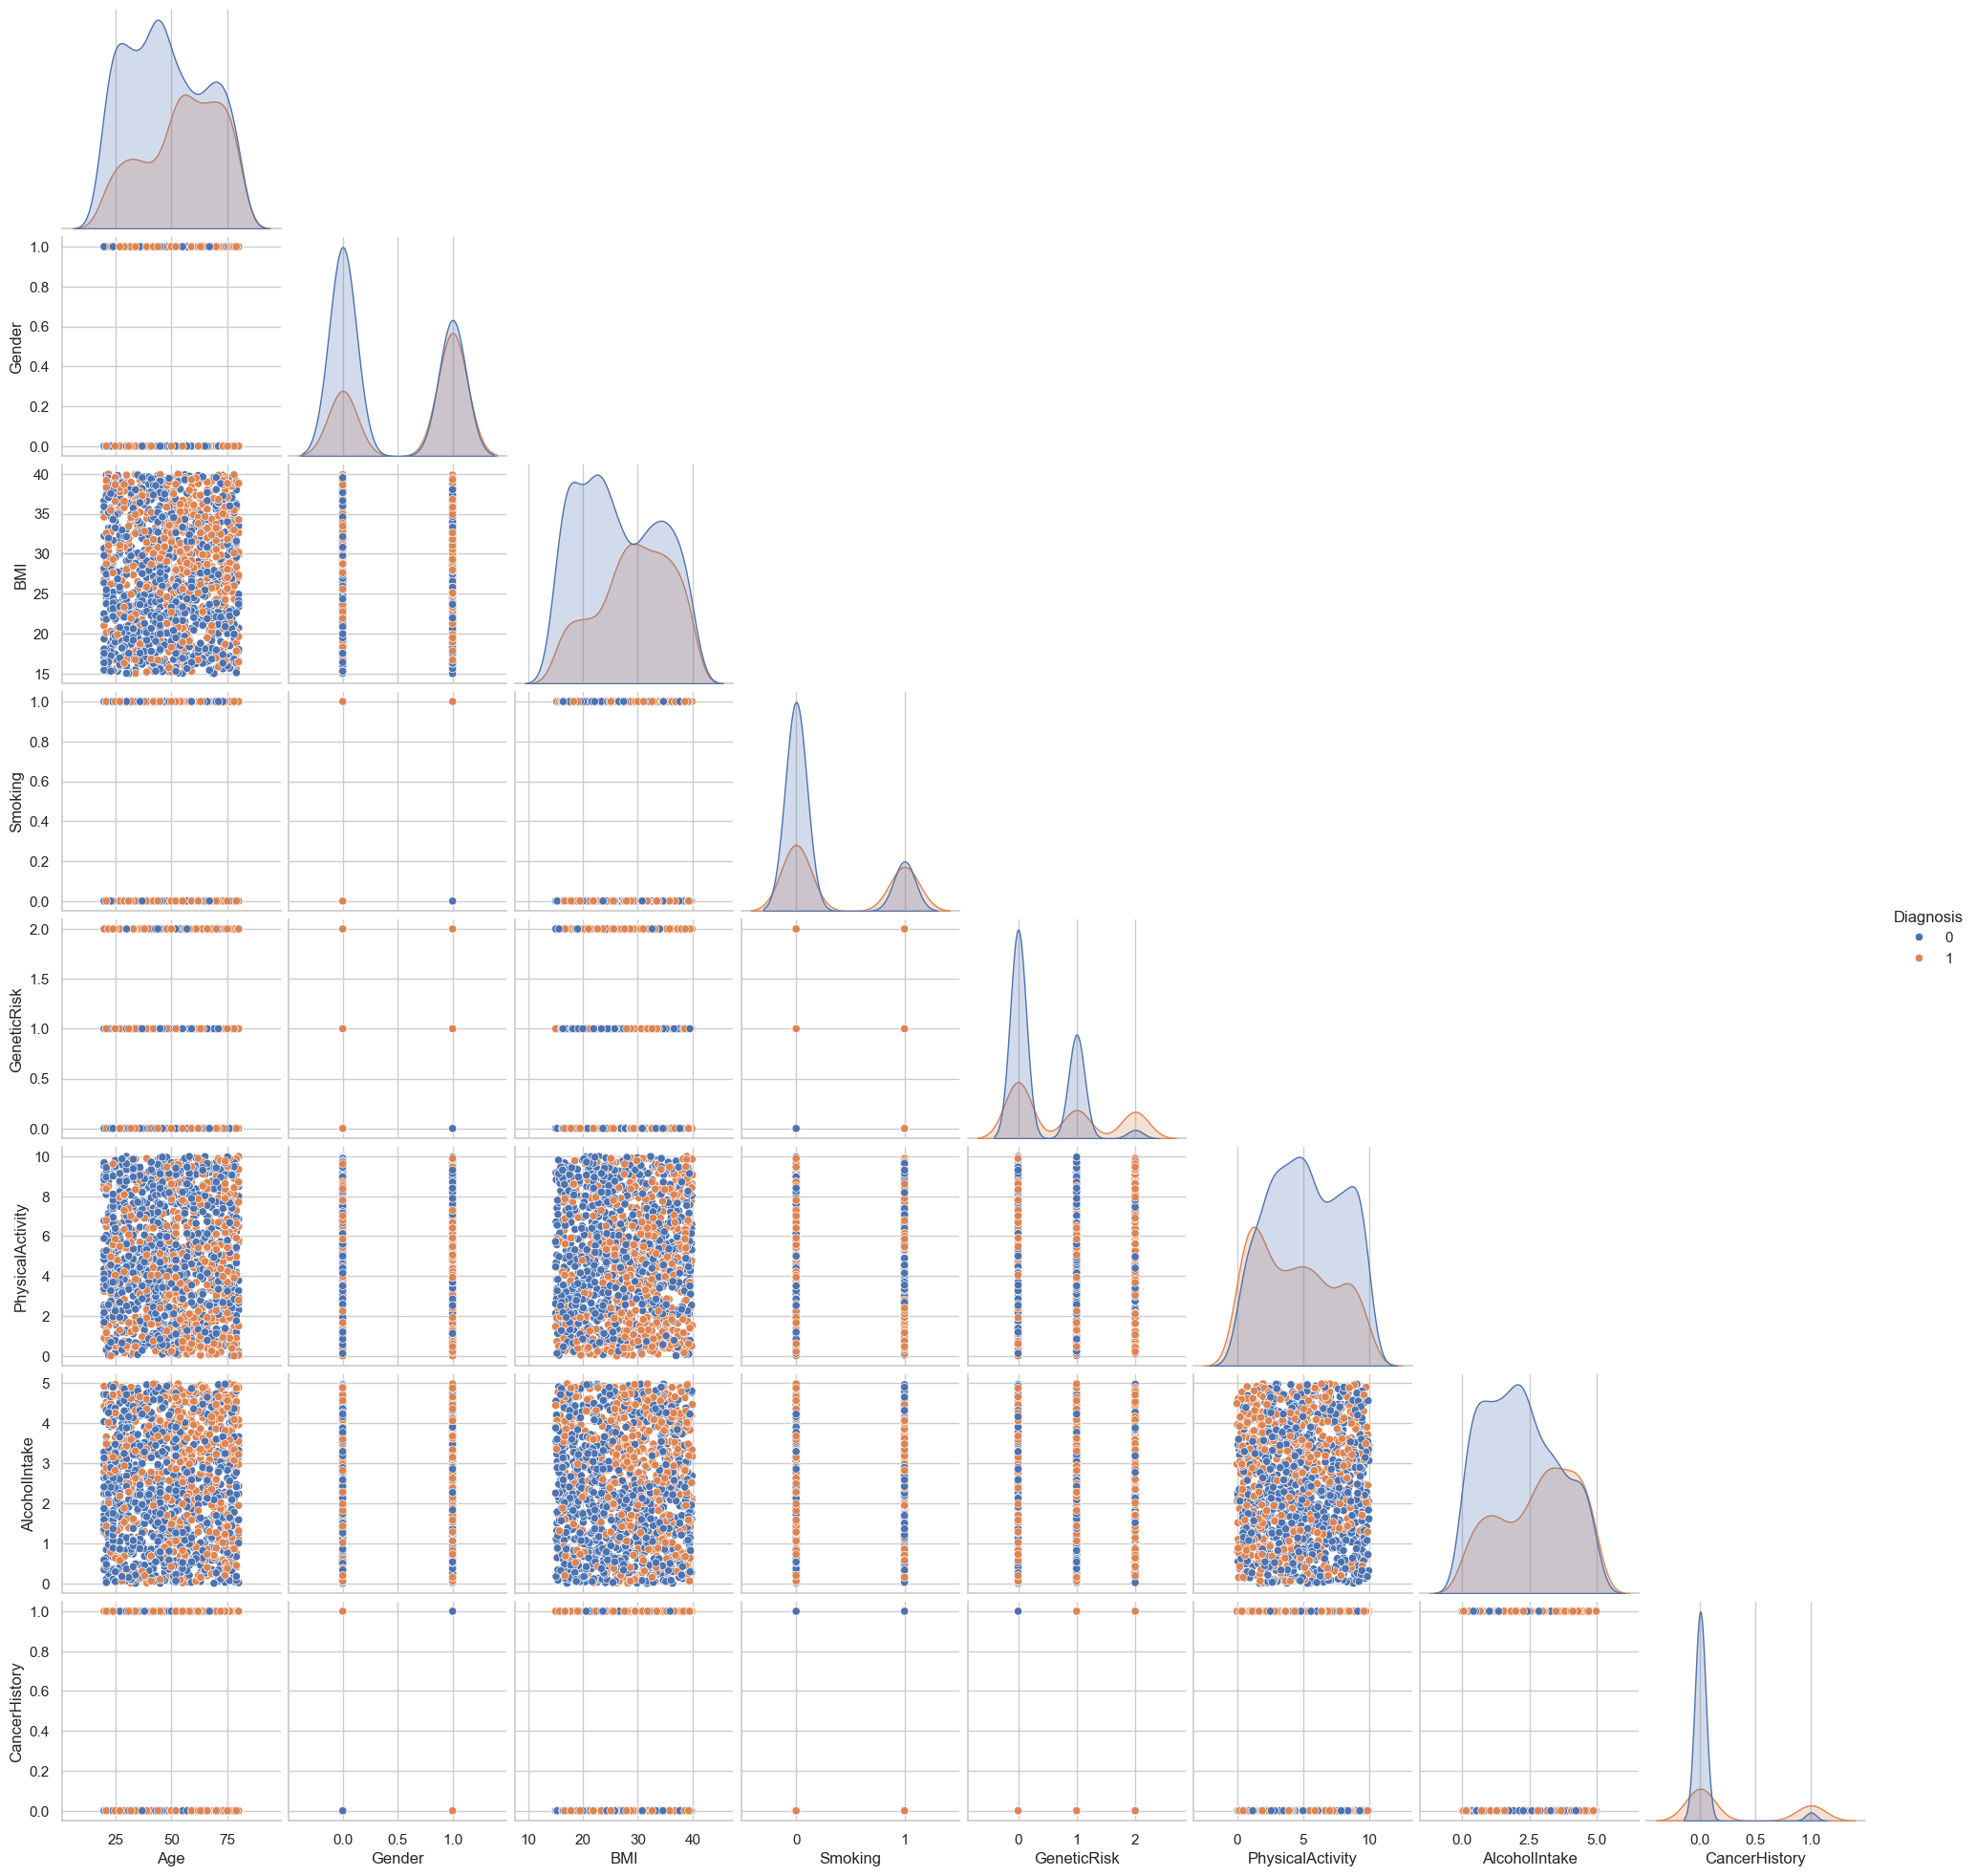

In [179]:
#I am now going to conduct a multivariate analysis to analyse the interdependicies between the continuous features
#using a pairplot to visualize the relationships between the dependent variables and the target variable.

sns.pairplot(df, hue='Diagnosis', corner=True)

# Correlation by group
corr_by_diagnosis = df.groupby('Diagnosis', observed=False)[continuous_features].corr()
display(corr_by_diagnosis)

seaborn.pairplot code obtained from the documentation at Waskom, M. (2024). seaborn.pairplot. Seaborn. https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:

#conducting T-tests for each continuous feature
#declaring a list to store results
results = []
#looping through each continuous feature to perform T-tests
for feature in continuous_features:
    #splitting the feature values based on both binary diagnoses
    cancer = df[df['Diagnosis'] == 1][feature]
    no_cancer = df[df['Diagnosis'] == 0][feature]
    #performing the t-test on the both groups
    t_stat, p_val = ttest_ind(cancer, no_cancer, equal_var=False)

    #appending the results to the list because I want to create a DataFrame later
    results.append({
        'Feature': feature,
        't-statistic': t_stat,
        'p-value': p_val
    })
results_df = pd.DataFrame(results)

significant_features = results_df[results_df['p-value'] < 0.05]
print(significant_features)


            Feature  t-statistic       p-value
0               Age     7.846796  9.350830e-15
1               BMI     7.584778  6.435918e-14
2     AlcoholIntake     8.362728  1.771755e-16
3  PhysicalActivity    -5.761972  1.079336e-08


Code for calculating the t-statistic was obtained for SciPy documentation and examples at The SciPy community. (2021). ttest_ind. SciPy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [78]:
#performing chi-squared tests for categorical features to see if there is a significant association between the categorical features and the target variable
 
#declaring a list to store results for Chi-squared tests
chi2_results = []

#using a for loop again to iterate through each categorical feature and perform Chi-squared tests
for cat in cat_columns:
    #creating a contingency table for the categorical feature and the target variable
    contingency_table = pd.crosstab(df[cat], df['Diagnosis'])
    #performing the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    #storing the results in a list because I want to display them in a DataFrame later
    chi2_results.append({
        'Feature': cat,
        'Chi2 Statistic': chi2,
        'Degrees of Freedom': dof,
        'P-Value': p_val,
        'Significant': 'Yes' if p_val < 0.05 else 'No'
    })

chi2_df = pd.DataFrame(chi2_results)
chi2_df.sort_values(by="P-Value", inplace=True)
print(chi2_df)

         Feature  Chi2 Statistic  Degrees of Freedom       P-Value Significant
0         Gender       92.968527                   1  1.079336e-08         Yes
1        Smoking       76.237267                   1  1.079336e-08         Yes
2  CancerHistory      228.410798                   1  1.079336e-08         Yes
3    GeneticRisk      167.432582                   2  1.079336e-08         Yes


The code for performing the Chi-square test was inspired by Data is power. (2023, May 26). Unleashing the Power of Categorical Relationships with Pandas in Python. Medium. https://medium.com/@smitpate08/unleashing-the-power-of-categorical-relationships-with-pandas-in-python-82fbe3917338.The Chi-Square test establishes if two categorical variables are significant correlation. It aids in hypothesis testing to check whether observed frequencies deviate from expected onesBiswal, A. (2025, April 27). Chi-Square Test: Formula, Types, & Examples. Simplilearn. https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test#:~:text=The%20Chi%2DSquare%20test%20determines,frequencies%20differ%20from%20expected%20ones. 

Text(0.5, 1.0, 'Correlation Heatmap of continuous Features')

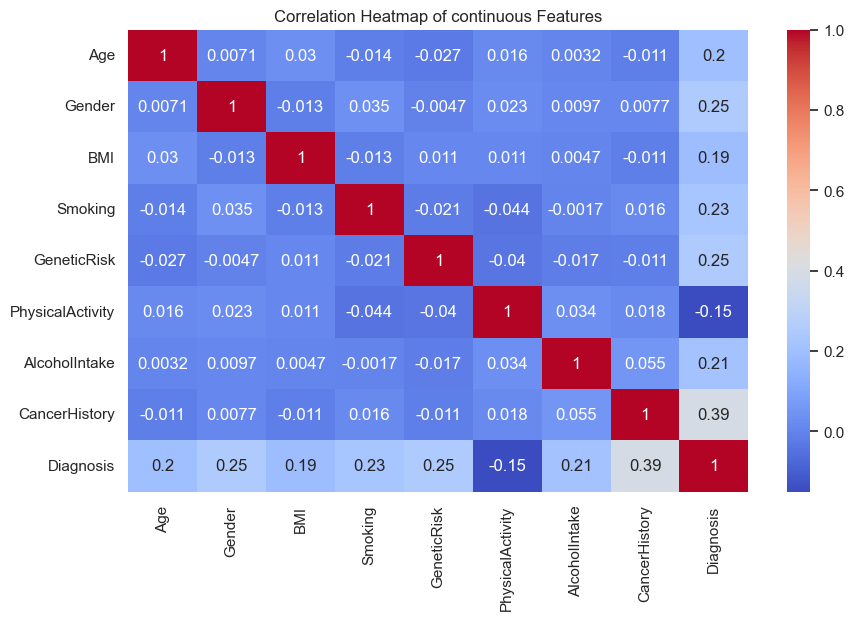

In [80]:
#creating a correlation heatmap to visualize the correlation between the continuous features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of continuous Features")


The code used to map the heatmap was obtained from the Online Retail customer segmentation data set analysis on kaggle that was used for PDAN ICE Task X.(Kumar, 2022). Kumar, S., 2024. student lifestyle dataset. [online] kaggle. Available at: <https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset> .

Feature engineering

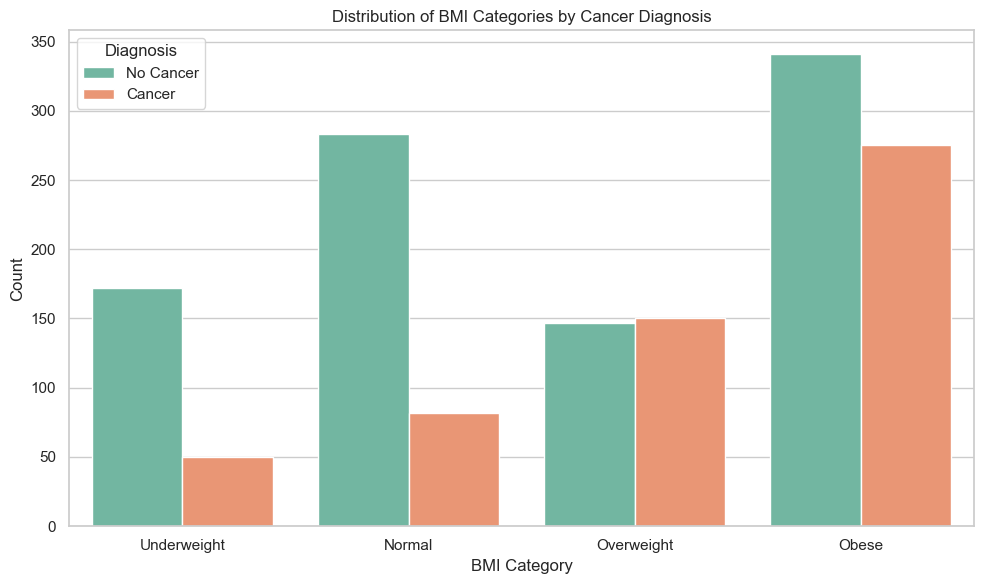

In [ ]:
#feature engineering
#creating a new feature 'BMI_Category' based on BMI values
#defining BMI categories based on standard ranges
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
#these ranges are based on standard BMI categories by the World Health Organization (WHO)
bmi_bins = [0, 18.5, 24.9, 29.9, 40]
#using pd.cut to categorize the BMI values into the defined categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Visualise the distribution of BMI categories against Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI_Category', hue='Diagnosis', palette='Set2')
plt.title('Distribution of BMI Categories by Cancer Diagnosis')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['No Cancer', 'Cancer'])
plt.tight_layout()
plt.show()

The code used for binning the BMI was inspired by Steele, M. (2021, April 5). Feature Engineering Examples: Binning Numerical Features. Towardsdatascience. https://towardsdatascience.com/feature-engineering-examples-binning-numerical-features-7627149093d/

In [ ]:
#creating a pipeline to apply standard scaling to the continuos features as the dataset is imbalanced and I want to use SMOTE to oversample the minority class. the randomforestmodel is also included in the pipeline.
#splitting the data into features and target variable by dropping the 'Diagnosis' column from the DataFrame and assigning it to X, and assigning the 'Diagnosis' column to y.
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# selectkbest  is being used to select the top 8 features based on the ANOVA F-value between the target variable and features.
selector = SelectKBest(score_func=f_classif, k=8)
#fitting the selector to the data and transforming it to get the selected features
X_selected = selector.fit_transform(X, y)

#getting a mask of the selected features to retrieve their names
mask = selector.get_support()
selected_feature_names = X.columns[mask]
#getting the F-scores of the selected features
scores = selector.scores_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': scores
})

#sorting the feature scores in descending order to see which features have the highest F-scores
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

#fil
selected_features_sorted = feature_scores[feature_scores['Feature'].isin(selected_feature_names)]
print("Selected features:", selected_feature_names)
print("Top 8 Selected Features (Ordered by F-score):")
print(selected_features_sorted.reset_index(drop=True))

Selected features: Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory'],
      dtype='object')
Top 8 Selected Features (Ordered by F-score):
            Feature     F-Score
0     CancerHistory  272.290765
1       GeneticRisk  102.851514
2            Gender  100.153161
3           Smoking   81.383210
4     AlcoholIntake   71.033153
5               Age   60.229806
6               BMI   54.619194
7  PhysicalActivity   34.522534


The scikit-learn SelectKbest documentation was used for feature selection at scikit-learn developers. (2025). SelectKBest. Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Age is going to be dropped

In [ ]:
X = df.drop(['Diagnosis', 'Age'], axis=1)
y = df['Diagnosis']

#assigning the continuous features to a list that will be scaled using StandardScaler
cols_to_scale = ['BMI', 'AlcoholIntake', 'PhysicalActivity']

#creating a pipeline to scale the continuous features, apply SMOTE for oversampling and fit a the model
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),            
    ('smote', SMOTE(random_state=42)),       
    ('model', RandomForestClassifier(random_state=42))
])

#defining the hyperparameter grid
param_dist = {
    'model__n_estimators': [100, 200, 300], #number of trees in the forest
    'model__max_depth': [None, 10, 20, 30], #maximum depth of the tree
    'model__min_samples_split': [2, 5, 10], #minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],#minimum number of samples required to be at a leaf node
    'model__max_features': ['sqrt', 'log2'] #number of features to consider when looking for the best split
}

#using stratified k-fold cross-validation to ensure that each fold has the same proportion of classes as the entire dataset.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#using randomizedsearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(
    pipeline,# RandomizedSearchCV is used to search for the best hyperparameters
    param_distributions=param_dist,#the hyperparameter grid to search
    n_iter=20, # number of different combinations to try
    scoring='f1', #ysing f1 as the scoring metric
    cv=cv, #using stratified k-fold cross-validation
    verbose=2, #to print the progress of the search
    random_state=42, #to ensure reproducibility
    n_jobs=-1 #to use all available cores for parallel processing
)
#fitting the model to the full data
random_search.fit(X, y)

#evaluating the best model using cross-validation
best_model = random_search.best_estimator_
scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1')

#displaying the F1 scores for each fold and the average F1 score
print("F1 Scores per Fold:", scores)
print("Average F1 Score:", scores.mean())
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
F1 Scores per Fold: [0.84745763 0.81012658 0.78787879 0.80658436 0.8125    ]
Average F1 Score: 0.812909471883166
Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 10}
Best F1 Score: 0.812909471883166


I used the imbalanced pipeline from imblearn with the code inspired from G. Lemaitre. (2016). imblearn.pipeline.Pipeline. Imbalanced-Learn. https://glemaitre.github.io/imbalanced-learn/generated/imblearn.pipeline.Pipeline.html.
The Randomizedsearchcv was learned from the scikit-learn documentation at scikit-learn developers. (2025). RandomizedSearchCV. Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
#here im split the data into training and test sets using the 80/20 rule then im fitting the best model on the training data and evaluating its performance on the test set
#splitting off a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#fitting the best model on training data
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

#predicting using the test set then evaluating
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88       189
           1       0.77      0.88      0.82       111

    accuracy                           0.86       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.87      0.86      0.86       300



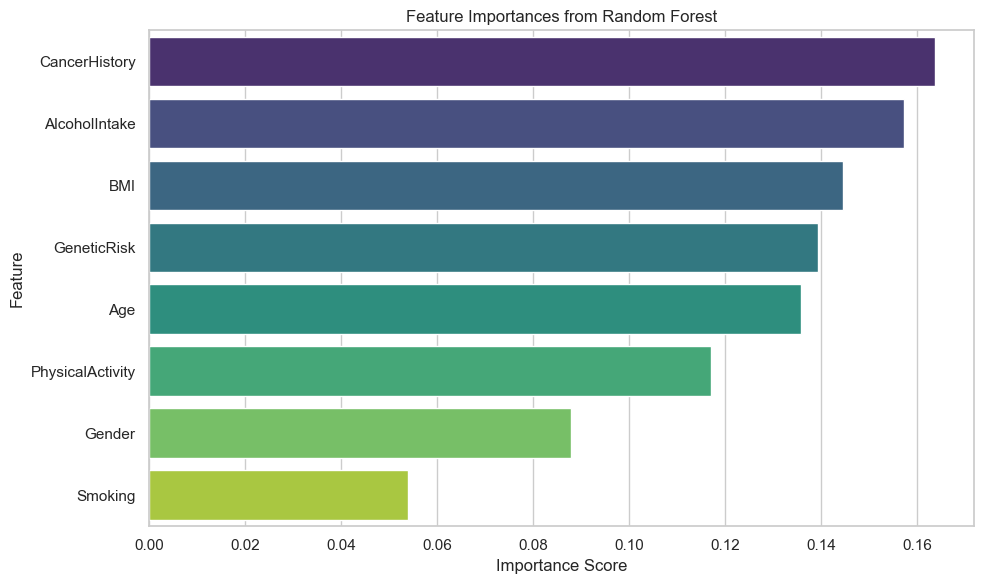

            Feature  Importance
7     CancerHistory    0.163722
6     AlcoholIntake    0.157366
2               BMI    0.144718
4       GeneticRisk    0.139327
0               Age    0.135924
5  PhysicalActivity    0.117066
1            Gender    0.087979
3           Smoking    0.053898


In [130]:
best_model = random_search.best_estimator_
rf = best_model.named_steps['model']
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print(importance_df)